In [1]:
import matplotlib

import sklearn

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import os
import sqlite3
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16.0, 6.0)
plt.rcParams['legend.markerscale'] = 3
matplotlib.rcParams['font.size'] = 16.0

from sklearn_pandas import DataFrameMapper, cross_val_score

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
DIR = os.getcwd() + "/../data/"
df = pd.read_csv(DIR + 'raw/loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# complete_cols = [column for column in df.columns if len(df[column][df[column].isnull()]) == 0]
# complete_cols

In [4]:
catagorical_cols = [
    'application_type', 'initial_list_status',
    'purpose', 'pymnt_plan', 'verification_status',
    'emp_length', 'term'
]

continous_cols =  [
 'loan_amnt','funded_amnt','funded_amnt_inv','installment',
 'dti','revol_bal'
]

y_col = ['int_rate']


In [5]:
df_data = df[catagorical_cols + continous_cols]

In [6]:
# Converted columns to floating point
for feature_name in continous_cols:
    df_data[feature_name] = df_data[feature_name].astype(float)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
data = pd.get_dummies(df_data)

In [8]:
data.tail(3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,dti,revol_bal,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w,...,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_n/a,term_ 36 months,term_ 60 months
887376,13000.0,13000.0,13000.0,316.07,30.90,11031.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887377,12000.0,12000.0,12000.0,317.86,27.19,8254.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887378,20000.0,20000.0,20000.0,664.20,10.83,33266.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
x = data.values[:, :]
y = df[y_col].values[:,-1]

In [10]:
# def encode_categorical(array):
#     if not array.dtype == np.dtype('float64'):
#         return LabelEncoder().fit_transform(array) 
#     else:
#         return array
    
# # Categorical columns for use in one-hot encoder
# categorical = (df_data.dtypes.values != np.dtype('float64'))

# # Encode all labels
# data = df_data.apply(encode_categorical)

# # Get numpy array from data
# x = data.values[:, :-1]
# y = data.values[:, -1]

# # Apply one hot endcoing
# encoder = OneHotEncoder(categorical_features=categorical[:-1], sparse=False)  # Last value in mask is y
# x = encoder.fit_transform(x)

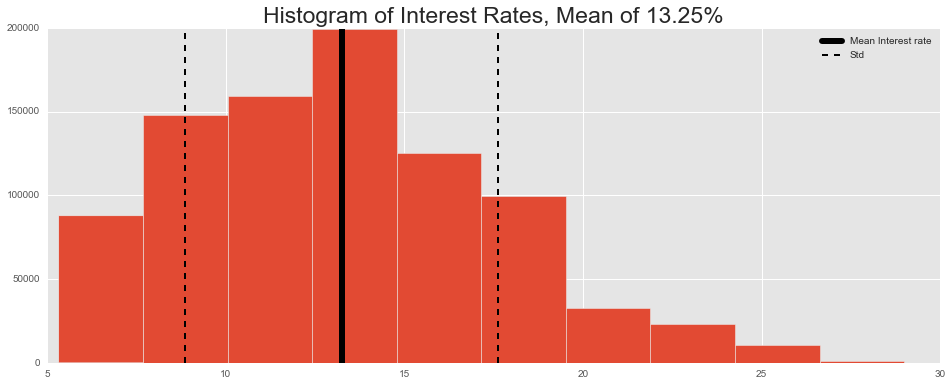

In [11]:
plt.hist(y, bins=10)  # plt.hist passes it's arguments to np.histogram
plt.axvline(np.mean(y), color='black', linestyle='-', lw=6, label='Mean Interest rate')
plt.axvline(np.mean(y) - np.std(y), color='black', linestyle='--', lw=2, label='Std')
plt.axvline(np.mean(y) + np.std(y), color='black', linestyle='--', lw=2)
plt.title("Histogram of Interest Rates, Mean of {:0.2f}%".format(np.mean(y)))
plt.legend()
plt.show()

In [12]:
%%bash
say 'Done'

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Ridge

I tried using LASSO, it took too long.

Regulaization doesn't seem to improve the error

In [63]:
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

scores_ridge = list()
scores_std_ridge = list()

ridge = Ridge()
coefs = []
errors = []

alphas = np.logspace(-6, 6, 20)

# Train the model with different regularisation strengths
for a in alphas:
    ridge.set_params(alpha=a)
    this_scores = cross_val_score(ridge, X_train, y_train, cv=3, n_jobs=1)
    scores_ridge.append(np.mean(this_scores))
    scores_std_ridge.append(np.std(this_scores))

(9.9999999999999995e-07, 1000000.0)

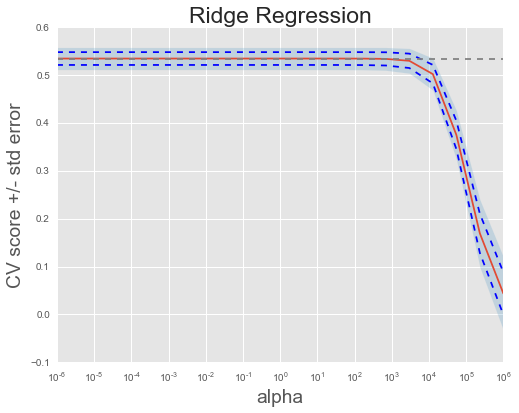

In [24]:
scores_ridge, scores_std_ridge = np.array(scores_ridge), np.array(scores_std_ridge)

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores_ridge)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std_ridge / np.sqrt(3)

plt.semilogx(alphas, scores_ridge + std_error, 'b--')
plt.semilogx(alphas, scores_ridge - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores_ridge + scores_std_ridge, scores_ridge - scores_std_ridge, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Ridge Regression')
plt.axhline(np.max(scores_ridge), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()

linreg.fit(X_train, y_train)

prediction = linreg.predict(X_test)

print(linreg.score(X_test, y_test))

print(mean_squared_error(prediction, y_test))

0.54677017964
8.72374023156


In [58]:
print('Intercept: {:0.2f}'.format(linreg.intercept_))

Intercept: 17.70


In [57]:
print('Coeff')
pd.DataFrame.from_dict(dict(zip(data.columns, linreg.coef_)), orient='index').T

Coeff


,funded_amnt_inv,emp_length_n/a,purpose_wedding,emp_length_7 years,purpose_house,purpose_medical,verification_status_Verified,application_type_JOINT,revol_bal,purpose_other,...,purpose_small_business,purpose_major_purchase,purpose_vacation,emp_length_2 years,pymnt_plan_y,purpose_credit_card,emp_length_1 year,emp_length_8 years,emp_length_10+ years,purpose_debt_consolidation
0,0.000042,0.014402,-0.108279,0.05202,0.67065,0.718338,0.657788,0.12279,-0.000006,0.788298,...,0.619513,-1.061428,1.252798,0.041809,0.00997,-1.628181,0.078514,-0.056309,-0.095276,-0.798157


In [67]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                 2.016e+04
Date:                Sat, 26 Nov 2016   Prob (F-statistic):               0.00
Time:                        23:57:22   Log-Likelihood:            -1.4845e+06
No. Observations:              594543   AIC:                         2.969e+06
Df Residuals:                  594506   BIC:                         2.969e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0003    1.2e-05    -27.602      0.0

# Baseline

In [62]:
base_line = [np.mean(y)]*len(y_test)
print('R^2 : {}'.format(r2_score(base_line, y_test)))
print('Meansquared error: {} '.format(mean_squared_error(base_line, y_test)))

R^2 : -3.8124522478882046e+29
Meansquared error: 19.24796500083821 


# Ada

In [77]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),
                          n_estimators=300, random_state=0)

ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=0)

In [78]:
ada.score(X_test, y_test)

0.23232151180906613

In [79]:
print('Feature Importances')
pd.DataFrame.from_dict(dict(zip(data.columns, ada.feature_importances_)), orient='index')

Feature Importances


,0
funded_amnt_inv,0.000000
emp_length_n/a,0.000000
purpose_wedding,0.000000
emp_length_7 years,0.000000
purpose_house,0.000000
purpose_medical,0.000000
verification_status_Verified,0.071393
application_type_JOINT,0.000000
revol_bal,0.023052
purpose_other,0.014412
